# Build a Text2SQL  Agentic AI System with LangGraph

### Building a Text2SQL Agentic AI System

In this project, we will design a **Text2SQL Agentic AI System** to enhance the interaction with databases using natural language queries. This workflow will leverage **LangGraph**, and build the agent from scratch. The workflow consists of the following components:

1. **Agent System Prompt**: The agent is designed to interpret user questions and generate syntactically correct SQL queries. Key rules include:
   - Limiting results to at most 10 unless specified by the user.
   - Querying only relevant columns instead of retrieving all columns from a table.
   - Ensuring plain text SQL query generation without additional formatting or code blocks.

2. **SQL Database Tools**: The system uses tools to interact with the database schema and validate queries:
   - **DB_QUERY**: Executes the generated SQL query.
   - **DB_SCHEMA**: Fetches the schema details of the database.
   - **DB_LIST_TABLES**: Lists all tables in the database.
   - **DB_QUERY_CHECKER**: Validates the correctness of the SQL query before execution.

3. **SQL Database Engine**: Executes the validated SQL queries and retrieves the required data from the database.

4. **ReAct Reasoning Framework**: The agent combines reasoning with actions to ensure accurate query formulation and execution.

5. **Final Response**: The results are processed and returned to the user in a human-friendly format.

By using LangGraph, this system ensures a more reliable, efficient, and user-friendly interaction with SQL databases, making it easier to extract meaningful insights from structured data.

![](https://i.imgur.com/4PNKql9.png)

## Install OpenAI, LangChain and LangGraph dependencies

In [ ]:
!pip install langgraph==1.0.2 langchain==1.0.5 langchain-openai==1.0.2 langchain-community==0.4.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.8/93.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.2/471.2 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.3/208.3 kB 14.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully u

## Install SQLite Server

In [ ]:
!apt-get install sqlite3 -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  sqlite3-doc
The following NEW packages will be installed:
  sqlite3
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 769 kB of archives.
After this operation, 1,874 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 sqlite3 amd64 3.37.2-2ubuntu0.5 [769 kB]
Fetched 769 kB in 1s (1,020 kB/s)
Selecting previously unselected package sqlite3.
(Reading database ... 125082 files and directories currently installed.)
Preparing to unpack .../sqlite3_3.37.2-2ubuntu0.5_amd64.deb ...
Unpacking sqlite3 (3.37.2-2ubuntu0.5) ...
Setting up sqlite3 (3.37.2-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...


## Setup Authentication and LLM Client

Here we authenticate and connect to necessary LLM Clients using OpenAI Authentication

In [ ]:
import os
import getpass

# OpenAI API Key (for chat & embeddings)
if not os.environ.get("OPENAI_API_KEY"):
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key (https://platform.openai.com/account/api-keys):\n")

Enter your OpenAI API key (https://platform.openai.com/account/api-keys):
··········


## Get SQL DB

In [ ]:
# in case of issues download from https://drive.google.com/file/d/1_BJL-X6I5RTQjFc5WySKNSoFHkb1EFc8/view?usp=sharing and upload
!gdown 1_BJL-X6I5RTQjFc5WySKNSoFHkb1EFc8

Downloading...
From: https://drive.google.com/uc?id=1_BJL-X6I5RTQjFc5WySKNSoFHkb1EFc8
To: /content/operations_insights.db
100% 36.9k/36.9k [00:00<00:00, 93.6MB/s]


## Create Operational Insights Database

In [ ]:
!sqlite3 --version

3.37.2 2022-01-06 13:25:41 872ba256cbf61d9290b571c0e6d82a20c224ca3ad82971edc46b29818d5dalt1


In [ ]:
!sqlite3 operations_insights.db "SELECT name FROM sqlite_master WHERE type='table';"

Department
Workflow
AuditLog
RoutingGap
FollowUpAction


In [ ]:
%%bash
sqlite3 operations_insights.db <<EOF
.headers on
.mode column
SELECT * FROM Department LIMIT 3;
EOF

DepartmentID  Name                     
------------  -------------------------
1             Finance Operations       
2             Procurement & Vendor Mgmt
3             Claims Processing Unit   


In [ ]:
from langchain_community.utilities import SQLDatabase

db = SQLDatabase.from_uri("sqlite:///operations_insights.db")
db

In [ ]:
print(db.dialect)
print(db.get_usable_table_names())

sqlite
['AuditLog', 'Department', 'FollowUpAction', 'RoutingGap', 'Workflow']


## 🧠 Overview of the Operations Insights Database

In this project, we will utilize an **Operations Insights Database** to demonstrate the capabilities of a Text2SQL workflow designed for operational diagnostics in enterprise workflows. The database schema includes the following entities and relationships:

1. **Department**: Contains details of business departments such as Finance Operations, Procurement, Claims Processing, etc.

2. **Workflow**: Represents business processes (e.g., Invoice Processing, Vendor Onboarding) and links them to departments.

3. **AuditLog**: Tracks historical audit entries including SLA issues, root causes, and recommended remediations, typically at a quarterly level.

4. **RoutingGap**: Captures live unresolved exceptions or routing failures in workflows, including severity, age, and status.

5. **FollowUpAction**: Logs corrective actions assigned to departments to resolve specific routing issues, with assignees and due dates.

### 🔄 Relationships:
- A **Department** can own multiple **Workflows**.
- A **Workflow** can have multiple **AuditLog** entries and **RoutingGaps**.
- A **RoutingGap** may result in one or more **FollowUpActions**.
- **FollowUpActions** are assigned by **Department** and linked to a specific **RoutingGap**.

This database schema is ideal for powering an agent that supports:
- Workflow audit analysis
- SLA breach diagnostics
- Routing exception monitoring
- Action tracking and reporting

The agent can convert natural language questions into SQL queries to retrieve relevant records and offer insights into enterprise process health.



![](https://i.imgur.com/O20Ds8c.png)

In [ ]:
db.run("SELECT * FROM Department LIMIT 5;", include_columns=True)

"[{'DepartmentID': 1, 'Name': 'Finance Operations'}, {'DepartmentID': 2, 'Name': 'Procurement & Vendor Mgmt'}, {'DepartmentID': 3, 'Name': 'Claims Processing Unit'}, {'DepartmentID': 4, 'Name': 'Customer Support Operations'}, {'DepartmentID': 5, 'Name': 'Legal & Contract Management'}]"

In [ ]:
db.run("SELECT * FROM Workflow LIMIT 5;", include_columns=True)

"[{'WorkflowID': 101, 'Name': 'Invoice Processing', 'DepartmentID': 1}, {'WorkflowID': 102, 'Name': 'Vendor Onboarding', 'DepartmentID': 2}, {'WorkflowID': 103, 'Name': 'Claims Approval', 'DepartmentID': 3}, {'WorkflowID': 104, 'Name': 'Customer Escalation Handling', 'DepartmentID': 4}, {'WorkflowID': 105, 'Name': 'Contract Review', 'DepartmentID': 5}]"

In [ ]:
db.run("SELECT * FROM AuditLog LIMIT 5;", include_columns=True)

"[{'AuditID': 'A001', 'WorkflowID': 101, 'Quarter': 'Q1-2024', 'Issue': 'SLA breach on invoice approvals', 'RootCause': 'Static approval chain', 'Recommendation': 'Add fallback approvers & escalation triggers'}, {'AuditID': 'A002', 'WorkflowID': 102, 'Quarter': 'Q1-2024', 'Issue': 'Intake failure for vendor documents', 'RootCause': 'Missing schema validation', 'Recommendation': 'Enforce validation at intake'}, {'AuditID': 'A003', 'WorkflowID': 103, 'Quarter': 'Q2-2024', 'Issue': 'Approval delays in claims triage', 'RootCause': 'Routing to deprecated inboxes', 'Recommendation': 'Update escalation and routing paths'}, {'AuditID': 'A004', 'WorkflowID': 104, 'Quarter': 'Q1-2024', 'Issue': 'Escalation SLAs frequently missed', 'RootCause': 'Unassigned escalations in queue', 'Recommendation': 'Assign escalation owners with SLA monitors'}, {'AuditID': 'A005', 'WorkflowID': 105, 'Quarter': 'Q2-2024', 'Issue': 'Contract approvals delayed', 'RootCause': 'Manual routing without reassignment logic'

In [ ]:
db.run("SELECT * FROM RoutingGap LIMIT 5;", include_columns=True)

"[{'GapID': 'RG001', 'WorkflowID': 102, 'Description': 'Unmonitored exception queue', 'AgeHours': 72, 'Severity': 'High', 'Status': 'Open'}, {'GapID': 'RG002', 'WorkflowID': 101, 'Description': 'Task routed to inactive approver', 'AgeHours': 48, 'Severity': 'Medium', 'Status': 'Open'}, {'GapID': 'RG003', 'WorkflowID': 103, 'Description': 'Escalation rules not triggered', 'AgeHours': 36, 'Severity': 'High', 'Status': 'Open'}, {'GapID': 'RG004', 'WorkflowID': 104, 'Description': 'Escalations sitting unassigned', 'AgeHours': 96, 'Severity': 'High', 'Status': 'Open'}, {'GapID': 'RG005', 'WorkflowID': 105, 'Description': 'Contract stuck in inactive user’s queue', 'AgeHours': 60, 'Severity': 'Medium', 'Status': 'Open'}]"

In [ ]:
db.run("SELECT * FROM FollowUpAction LIMIT 5;", include_columns=True)

"[{'ActionID': 'ACT001', 'GapID': 'RG001', 'DepartmentID': 2, 'AssignedTo': 'ops@company.com', 'ActionDescription': 'Configure monitored inbox for exceptions', 'DueDate': '2024-07-25', 'Status': 'Pending'}, {'ActionID': 'ACT002', 'GapID': 'RG002', 'DepartmentID': 1, 'AssignedTo': 'sla_team@company.com', 'ActionDescription': 'Add backup approver in routing config', 'DueDate': '2024-07-28', 'Status': 'Pending'}, {'ActionID': 'ACT003', 'GapID': 'RG003', 'DepartmentID': 3, 'AssignedTo': 'claims_ops@company.com', 'ActionDescription': 'Fix escalation rules and notification triggers', 'DueDate': '2024-07-30', 'Status': 'Pending'}, {'ActionID': 'ACT004', 'GapID': 'RG004', 'DepartmentID': 4, 'AssignedTo': 'support_ops@company.com', 'ActionDescription': 'Assign SLA monitors for escalations', 'DueDate': '2024-07-27', 'Status': 'Pending'}, {'ActionID': 'ACT005', 'GapID': 'RG005', 'DepartmentID': 5, 'AssignedTo': 'legal_team@company.com', 'ActionDescription': 'Enable reassignment after 48h timeout'

In [ ]:
print(db.get_table_info(table_names=['Department', 'Workflow']))


CREATE TABLE "Department" (
	"DepartmentID" INTEGER, 
	"Name" TEXT NOT NULL, 
	PRIMARY KEY ("DepartmentID")
)

/*
3 rows from Department table:
DepartmentID	Name
1	Finance Operations
2	Procurement & Vendor Mgmt
3	Claims Processing Unit
*/


CREATE TABLE "Workflow" (
	"WorkflowID" INTEGER, 
	"Name" TEXT NOT NULL, 
	"DepartmentID" INTEGER, 
	PRIMARY KEY ("WorkflowID"), 
	FOREIGN KEY("DepartmentID") REFERENCES "Department" ("DepartmentID")
)

/*
3 rows from Workflow table:
WorkflowID	Name	DepartmentID
101	Invoice Processing	1
102	Vendor Onboarding	2
103	Claims Approval	3
*/


## Load up SQL Tools

The system uses tools to interact with the database schema and validate queries:
   - **DB_QUERY**: Executes the generated SQL query.
   - **DB_SCHEMA**: Fetches the schema details of the database.
   - **DB_LIST_TABLES**: Lists all tables in the database.
   - **DB_QUERY_CHECKER**: Validates the correctness of the SQL query before execution.

![](https://i.imgur.com/iVSrFE3.png)   

In [ ]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
sql_toolkit = SQLDatabaseToolkit(db=db, llm=llm)
sql_tools = sql_toolkit.get_tools()

sql_tools

[QuerySQLDatabaseTool(description="Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.", db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x7f4204334b90>),
 InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x7f4204334b90>),
 ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x7f4204334b90>),
 QuerySQLCheckerTool(description='Use this tool to double check

In [ ]:
for tool in sql_tools:
    print(tool.name, '->', tool.description)

sql_db_query -> Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.
sql_db_schema -> Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3
sql_db_list_tables -> Input is an empty string, output is a comma-separated list of tables in the database.
sql_db_query_checker -> Use this tool to double check if your query is correct before executing it. Always use this tool before executing a query with sql_db_query!


In [ ]:
llm_with_tools = llm.bind_tools(tools=sql_tools)

## Create ReAct Agent Instruction Prompt

In [ ]:
from langchain_core.messages import SystemMessage

AGENT_INSTRUCTIONS = r"""
You are an agent designed to interact with a SQLite database that tracks operational audits, workflow gaps,
and follow-up actions in an enterprise context.

You must generate syntactically correct SQL queries and then use them to answer user questions.

---

The database has the following important relationships:

- `Department(DepartmentID, Name)`
  → Maps department names (e.g., Finance Operations)

- `Workflow(WorkflowID, Name, DepartmentID)`
  → Links specific workflows to departments

- `AuditLog(AuditID, WorkflowID, Quarter, Issue, RootCause, Recommendation)`
  → Stores historical SLA failures, their causes and recommended remediations

- `RoutingGap(GapID, WorkflowID, Description, AgeHours, Severity, Status)`
  → Lists unresolved operational issues in workflows

- `FollowUpAction(ActionID, GapID, DepartmentID, AssignedTo, ActionDescription, DueDate, Status)`
  → Tracks who is assigned to fix what, and by when

---

Use JOINs to resolve cross-table queries. For example:
- To get all routing gaps for a department, join: `RoutingGap → Workflow → Department`
- To retrieve follow-up actions by department, join: `FollowUpAction → Department`
- To investigate audit reasons for delays, join: `AuditLog → Workflow → Department`

---

Important Instructions for a typical flow:
- Start by listing the available tables ( use `sql_db_list_tables` tool) to understand what tables are there
- Then inspect relevant table schemas using (`sql_db_schema` tool) based on your understanding of the query
- Only query relevant fields; never use `SELECT *`
- Always limit the result to 10 rows unless otherwise specified
- Always verify your SQL syntax using the `sql_db_query_checker` tool before execution
- Finally use the `sql_db_query` to execute your SQL query on the database and get relevant information
- Never generate INSERT, UPDATE, DELETE, or DROP statements

---

Output Format:
- Using above instructions create the final SQL query **as plain text**, no code blocks, no SQL markers or markdown and execute it
- Analyze results and create your final response based on the user query.
- Response should be easy to understand for the user, only use context from the results, do not add unnecessary suggestions out of context.
- Escape markdown-sensitive characters (e.g. $ → \$) when presenting the final response
- Do NOT include SQL queries in the final response

Example query:
SELECT Issue, RootCause FROM AuditLog A JOIN Workflow W ON A.WorkflowID = W.WorkflowID JOIN Department D ON W.DepartmentID = D.DepartmentID WHERE D.Name = 'Procurement & Vendor Mgmt' LIMIT 10
"""

SYS_PROMPT = SystemMessage(content=AGENT_INSTRUCTIONS)

## Create Text2SQL ReAct Agent

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

In [ ]:
from langchain_core.messages import SystemMessage, HumanMessage
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition
from IPython.display import display, Image, Markdown
from typing import Literal

# Create the node function that handles reasoning and planning using the LLM
def tool_calling_llm(state: State) -> State:
    # Extract the current conversation history from the state
    current_state = state["messages"]

    # Prepend the system instructions to the current message history
    state_with_instructions = [SYS_PROMPT] + current_state

    # Call the LLM to generate a new message (either a response or a tool call request)
    response = [llm_with_tools.invoke(state_with_instructions)]

    # Return the updated state containing the new message
    return {"messages": response}

# Helps in conditional routing to conditional edges
def agent_conditional_routing(state: State) -> Literal["tools", "__end__"]:
    # Checks if a tool or tools need to be called or LLM can generate output for next step
    last_state_message = state["messages"][-1]
    if last_state_message.tool_calls and len(last_state_message.tool_calls) > 0:
        return "tools"
    return "__end__"

# Build the graph
builder = StateGraph(State)

# Add nodes
builder.add_node("agent", tool_calling_llm)
builder.add_node("tool_node", ToolNode(tools=sql_tools))

# Add edges
builder.add_edge(START, "agent")
# Conditional edge
builder.add_conditional_edges(
    "agent",
    agent_conditional_routing, # conditional routing function - you can also use inbuilt tools_condition here
    {
        "tools": "tool_node", # If the latest message (result) from LLM is a tool call request -> tools_condition routes to tools
        "__end__": END # If the latest message (result) from LLM is a not a tool call -> tools_condition routes to END
    }
)
builder.add_edge("tool_node", "agent") # this is the key feedback loop in the agentic system

# Compile Agent Graph
text2sql_agent = builder.compile()

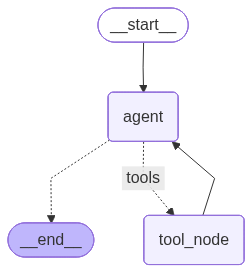

In [ ]:
text2sql_agent

## Run and Test Text2SQL Agent

In [ ]:
# get agent streaming utils
!gdown 1dSyjcjlFoZpYEqv4P9Oi0-kU2gIoolMB

Downloading...
From (original): https://drive.google.com/uc?id=1dSyjcjlFoZpYEqv4P9Oi0-kU2gIoolMB
From (redirected): https://drive.google.com/uc?id=1dSyjcjlFoZpYEqv4P9Oi0-kU2gIoolMB&confirm=t&uuid=5388cb2f-ab3a-487f-8775-c21f357e9114
To: /content/agent_utils.py
100% 6.45k/6.45k [00:00<00:00, 23.2MB/s]


In [ ]:
from agent_utils import format_message

def call_text2sql_agent(query, verbose=False):

    for event in text2sql_agent.stream(
        {"messages": [HumanMessage(content=query)]},
        stream_mode='values' #returns full agent state with all messages including updates
    ):
        if verbose:
            format_message(event["messages"][-1])

    print('\n\nFinal Response:\n')
    display(Markdown(event["messages"][-1].content))
    return event["messages"]


In [ ]:
query = "Why did Finance miss SLA in Q1?"
response = call_text2sql_agent(query=query,
                               verbose=True)

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ Why did Finance miss SLA in Q1?                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── ⚙️ Tool Request ─────────────────────────────────────────────────╮
│                                                                                                                 │
│ 🔧 Tool Call: sql_db_list_tables                                                                                │
│    Args: {}                                                                                                     │
│    ID: call_KTIkfSj9vlVH9uMpKA7xUzTz                                                                            │
│                                                                                                                 │
│ 🔧 Tool Call: sql_db_list_tables                                                                                │
│    Args: {}                                                                                                     │
│    ID: call_852jEnVZ6QeiFFZI7HwPFZuK                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ AuditLog, Department, FollowUpAction, RoutingGap, Workflow                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── ⚙️ Tool Request ─────────────────────────────────────────────────╮
│                                                                                                                 │
│ 🔧 Tool Call: sql_db_schema                                                                                     │
│    Args: {                                                                                                      │
│   "table_names": "AuditLog"                                                                                     │
│ }                                                                                                               │
│    ID: call_GCPEb2GN7r0Y77cdv8jwdpCo                                                                            │
│                                                                                                                 │
│ 🔧 Tool Call: sql_db_schema                                                                                     │
│    Args: {                                                                                                      │
│   "table_names": "Workflow"                                                                                     │
│ }                                                                                                               │
│    ID: call_BrmF8K4KthgYvNLRLlJHeUIT                                                                            │
│                                                                                                                 │
│ 🔧 Tool Call: sql_db_schema                                                                                     │
│    Args: {                                                                                                      │
│   "table_names": "Department"                                                                                   │
│ }                                                                                                               │
│    ID: call_swWHLFTnNFutfQxzErZ0iQp6                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│                                                                                                                 │
│ CREATE TABLE "Department" (                                                                                     │
│         "DepartmentID" INTEGER,                                                                                 │
│         "Name" TEXT NOT NULL,                                                                                   │
│         PRIMARY KEY ("DepartmentID")                                                                            │
│ )                                                                                                               │
│                                                                                                                 │
│ /*                                                                                                              │
│ 3 rows from Department table:                                                                                   │
│ DepartmentID    Name                                                                                            │
│ 1       Finance Operations                                                                                      │
│ 2       Procurement & Vendor Mgmt                                                                               │
│ 3       Claims Processing Unit                                                                                  │
│ */                                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── ⚙️ Tool Request ─────────────────────────────────────────────────╮
│                                                                                                                 │
│ 🔧 Tool Call: sql_db_query_checker                                                                              │
│    Args: {                                                                                                      │
│   "query": "SELECT Issue, RootCause FROM AuditLog A JOIN Workflow W ON A.WorkflowID = W.WorkflowID JOIN         │
│ Department D ON W.DepartmentID = D.DepartmentID WHERE D.Name = 'Finance Operations' AND A.Quarter = 'Q1-2024'   │
│ LIMIT 10"                                                                                                       │
│ }                                                                                                               │
│    ID: call_VAicXO9d5IYuGH4benDsrPCQ                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ ```sql                                                                                                          │
│ SELECT Issue, RootCause FROM AuditLog A JOIN Workflow W ON A.WorkflowID = W.WorkflowID JOIN Department D ON     │
│ W.DepartmentID = D.DepartmentID WHERE D.Name = 'Finance Operations' AND A.Quarter = 'Q1-2024' LIMIT 10          │
│ ```                                                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── ⚙️ Tool Request ─────────────────────────────────────────────────╮
│                                                                                                                 │
│ 🔧 Tool Call: sql_db_query                                                                                      │
│    Args: {                                                                                                      │
│   "query": "SELECT Issue, RootCause FROM AuditLog A JOIN Workflow W ON A.WorkflowID = W.WorkflowID JOIN         │
│ Department D ON W.DepartmentID = D.DepartmentID WHERE D.Name = 'Finance Operations' AND A.Quarter = 'Q1-2024'   │
│ LIMIT 10"                                                                                                       │
│ }                                                                                                               │
│    ID: call_fhvjOXOod1ZIUMJ5XJiCmwff                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ [('SLA breach on invoice approvals', 'Static approval chain')]                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────── 🤖 Assistant ──────────────────────────────────────────────────╮
│ In Q1, Finance Operations missed the SLA due to an "SLA breach on invoice approvals," which was caused by a     │
│ "Static approval chain."                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯



Final Response:



In Q1, Finance Operations missed the SLA due to an "SLA breach on invoice approvals," which was caused by a "Static approval chain."

In [ ]:
response = call_text2sql_agent(query="Which department has the highest unresolved issues",
                               verbose=False)



Final Response:



The department with the highest unresolved issues is **Procurement & Vendor Mgmt**, which currently has **2 unresolved issues**.

In [ ]:
response = call_text2sql_agent(query="What open issues exist in procurement?",
                               verbose=True)

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ What open issues exist in procurement?                                                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── ⚙️ Tool Request ─────────────────────────────────────────────────╮
│                                                                                                                 │
│ 🔧 Tool Call: sql_db_list_tables                                                                                │
│    Args: {}                                                                                                     │
│    ID: call_8al5GmX3RavPuLuZ4LVVLs8I                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ AuditLog, Department, FollowUpAction, RoutingGap, Workflow                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── ⚙️ Tool Request ─────────────────────────────────────────────────╮
│                                                                                                                 │
│ 🔧 Tool Call: sql_db_schema                                                                                     │
│    Args: {                                                                                                      │
│   "table_names": "Department, Workflow, RoutingGap"                                                             │
│ }                                                                                                               │
│    ID: call_XK4ritUHb5XPzVkuZ0XmOi9D                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│                                                                                                                 │
│ CREATE TABLE "Department" (                                                                                     │
│         "DepartmentID" INTEGER,                                                                                 │
│         "Name" TEXT NOT NULL,                                                                                   │
│         PRIMARY KEY ("DepartmentID")                                                                            │
│ )                                                                                                               │
│                                                                                                                 │
│ /*                                                                                                              │
│ 3 rows from Department table:                                                                                   │
│ DepartmentID    Name                                                                                            │
│ 1       Finance Operations                                                                                      │
│ 2       Procurement & Vendor Mgmt                                                                               │
│ 3       Claims Processing Unit                                                                                  │
│ */                                                                                                              │
│                                                                                                                 │
│                                                                                                                 │
│ CREATE TABLE "RoutingGap" (                                                                                     │
│         "GapID" TEXT,                                                                                           │
│         "WorkflowID" INTEGER,                                                                                   │
│         "Description" TEXT,                                                                                     │
│         "AgeHours" INTEGER,                                                                                     │
│         "Severity" TEXT,                                                                                        │
│         "Status" TEXT,                                                                                          │
│         PRIMARY KEY ("GapID"),                                                                                  │
│         FOREIGN KEY("WorkflowID") REFERENCES "Workflow" ("WorkflowID")                                          │
│ )                                                                                                               │
│                                                                                                                 │
│ /*                                                                                                              │
│ 3 rows from RoutingGap table:                                                                                   │
│ GapID   WorkflowID      Description     AgeHours        Severity        Status                                  │
│ RG001   102     Unmonitored exception queue     72      High    Open                                            │
│ RG002   101     Task routed to inactive approver        48      Medium  Open                                    │
│ RG003   103     Escalation rules not triggered  36      High    Open                                            │
│ */                                                     

╭──────────────────────────────────────────────── ⚙️ Tool Request ─────────────────────────────────────────────────╮
│                                                                                                                 │
│ 🔧 Tool Call: sql_db_query_checker                                                                              │
│    Args: {                                                                                                      │
│   "query": "SELECT RG.Description, RG.AgeHours, RG.Severity, RG.Status FROM RoutingGap RG JOIN Workflow W ON    │
│ RG.WorkflowID = W.WorkflowID JOIN Department D ON W.DepartmentID = D.DepartmentID WHERE D.Name = 'Procurement & │
│ Vendor Mgmt' AND RG.Status = 'Open' LIMIT 10"                                                                   │
│ }                                                                                                               │
│    ID: call_ucoAWln1DrBDYGaS9Ivt09mf                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ ```sql                                                                                                          │
│ SELECT RG.Description, RG.AgeHours, RG.Severity, RG.Status                                                      │
│ FROM RoutingGap RG                                                                                              │
│ JOIN Workflow W ON RG.WorkflowID = W.WorkflowID                                                                 │
│ JOIN Department D ON W.DepartmentID = D.DepartmentID                                                            │
│ WHERE D.Name = 'Procurement & Vendor Mgmt'                                                                      │
│ AND RG.Status = 'Open'                                                                                          │
│ LIMIT 10                                                                                                        │
│ ```                                                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── ⚙️ Tool Request ─────────────────────────────────────────────────╮
│                                                                                                                 │
│ 🔧 Tool Call: sql_db_query                                                                                      │
│    Args: {                                                                                                      │
│   "query": "SELECT RG.Description, RG.AgeHours, RG.Severity, RG.Status FROM RoutingGap RG JOIN Workflow W ON    │
│ RG.WorkflowID = W.WorkflowID JOIN Department D ON W.DepartmentID = D.DepartmentID WHERE D.Name = 'Procurement & │
│ Vendor Mgmt' AND RG.Status = 'Open' LIMIT 10"                                                                   │
│ }                                                                                                               │
│    ID: call_FnZu6ZHrDZjJwhnhHnSA86Pk                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ [('Unmonitored exception queue', 72, 'High', 'Open'), ('No auto-forwarding on vendor rejections', 48, 'Low',    │
│ 'Open')]                                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────── 🤖 Assistant ──────────────────────────────────────────────────╮
│ There are currently two open issues in the Procurement & Vendor Management department:                          │
│                                                                                                                 │
│ 1. **Description**: Unmonitored exception queue                                                                 │
│    - **Age**: 72 hours                                                                                          │
│    - **Severity**: High                                                                                         │
│    - **Status**: Open                                                                                           │
│                                                                                                                 │
│ 2. **Description**: No auto-forwarding on vendor rejections                                                     │
│    - **Age**: 48 hours                                                                                          │
│    - **Severity**: Low                                                                                          │
│    - **Status**: Open                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯



Final Response:



There are currently two open issues in the Procurement & Vendor Management department:

1. **Description**: Unmonitored exception queue
   - **Age**: 72 hours
   - **Severity**: High
   - **Status**: Open

2. **Description**: No auto-forwarding on vendor rejections
   - **Age**: 48 hours
   - **Severity**: Low
   - **Status**: Open

In [ ]:
response = call_text2sql_agent(query="Which workflows had the most audits?",
                    verbose=False)



Final Response:



The workflows with the most audits are as follows:

1. **Vendor Onboarding** - 2 audits
2. **Invoice Processing** - 1 audit
3. **Customer Escalation Handling** - 1 audit
4. **Contract Review** - 1 audit
5. **Claims Approval** - 1 audit

Vendor Onboarding had the highest number of audits, with a total of 2.

In [ ]:
response = call_text2sql_agent(query="Show me unresolved issues older than 48 hours.",
                               verbose=True)

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ Show me unresolved issues older than 48 hours.                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── ⚙️ Tool Request ─────────────────────────────────────────────────╮
│                                                                                                                 │
│ 🔧 Tool Call: sql_db_list_tables                                                                                │
│    Args: {}                                                                                                     │
│    ID: call_drZRIkfUzqprTdbn2iBESBAA                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ AuditLog, Department, FollowUpAction, RoutingGap, Workflow                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── ⚙️ Tool Request ─────────────────────────────────────────────────╮
│                                                                                                                 │
│ 🔧 Tool Call: sql_db_schema                                                                                     │
│    Args: {                                                                                                      │
│   "table_names": "RoutingGap"                                                                                   │
│ }                                                                                                               │
│    ID: call_7ZPKzS2ngY21iKmuhtX5zUvJ                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│                                                                                                                 │
│ CREATE TABLE "RoutingGap" (                                                                                     │
│         "GapID" TEXT,                                                                                           │
│         "WorkflowID" INTEGER,                                                                                   │
│         "Description" TEXT,                                                                                     │
│         "AgeHours" INTEGER,                                                                                     │
│         "Severity" TEXT,                                                                                        │
│         "Status" TEXT,                                                                                          │
│         PRIMARY KEY ("GapID"),                                                                                  │
│         FOREIGN KEY("WorkflowID") REFERENCES "Workflow" ("WorkflowID")                                          │
│ )                                                                                                               │
│                                                                                                                 │
│ /*                                                                                                              │
│ 3 rows from RoutingGap table:                                                                                   │
│ GapID   WorkflowID      Description     AgeHours        Severity        Status                                  │
│ RG001   102     Unmonitored exception queue     72      High    Open                                            │
│ RG002   101     Task routed to inactive approver        48      Medium  Open                                    │
│ RG003   103     Escalation rules not triggered  36      High    Open                                            │
│ */                                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── ⚙️ Tool Request ─────────────────────────────────────────────────╮
│                                                                                                                 │
│ 🔧 Tool Call: sql_db_query_checker                                                                              │
│    Args: {                                                                                                      │
│   "query": "SELECT GapID, Description, AgeHours, Severity, Status FROM RoutingGap WHERE AgeHours > 48 AND       │
│ Status = 'Open' LIMIT 10"                                                                                       │
│ }                                                                                                               │
│    ID: call_FvvTKsmM3HPoomWuoIyFj585                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ ```sql                                                                                                          │
│ SELECT GapID, Description, AgeHours, Severity, Status FROM RoutingGap WHERE AgeHours > 48 AND Status = 'Open'   │
│ LIMIT 10                                                                                                        │
│ ```                                                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── ⚙️ Tool Request ─────────────────────────────────────────────────╮
│                                                                                                                 │
│ 🔧 Tool Call: sql_db_query                                                                                      │
│    Args: {                                                                                                      │
│   "query": "SELECT GapID, Description, AgeHours, Severity, Status FROM RoutingGap WHERE AgeHours > 48 AND       │
│ Status = 'Open' LIMIT 10"                                                                                       │
│ }                                                                                                               │
│    ID: call_6RFMK0cyAJ7WpdMxrV2ENBxc                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ [('RG001', 'Unmonitored exception queue', 72, 'High', 'Open'), ('RG004', 'Escalations sitting unassigned', 96,  │
│ 'High', 'Open'), ('RG005', 'Contract stuck in inactive user’s queue', 60, 'Medium', 'Open')]                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────── 🤖 Assistant ──────────────────────────────────────────────────╮
│ Here are the unresolved issues that are older than 48 hours:                                                    │
│                                                                                                                 │
│ 1. **Gap ID:** RG001                                                                                            │
│    - **Description:** Unmonitored exception queue                                                               │
│    - **Age:** 72 hours                                                                                          │
│    - **Severity:** High                                                                                         │
│    - **Status:** Open                                                                                           │
│                                                                                                                 │
│ 2. **Gap ID:** RG004                                                                                            │
│    - **Description:** Escalations sitting unassigned                                                            │
│    - **Age:** 96 hours                                                                                          │
│    - **Severity:** High                                                                                         │
│    - **Status:** Open                                                                                           │
│                                                                                                                 │
│ 3. **Gap ID:** RG005                                                                                            │
│    - **Description:** Contract stuck in inactive user’s queue                                                   │
│    - **Age:** 60 hours                                                                                          │
│    - **Severity:** Medium                                                                                       │
│    - **Status:** Open                                                                                           │
│                                                                                                                 │
│ These issues are currently open and require attention.                                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯



Final Response:



Here are the unresolved issues that are older than 48 hours:

1. **Gap ID:** RG001
   - **Description:** Unmonitored exception queue
   - **Age:** 72 hours
   - **Severity:** High
   - **Status:** Open

2. **Gap ID:** RG004
   - **Description:** Escalations sitting unassigned
   - **Age:** 96 hours
   - **Severity:** High
   - **Status:** Open

3. **Gap ID:** RG005
   - **Description:** Contract stuck in inactive user’s queue
   - **Age:** 60 hours
   - **Severity:** Medium
   - **Status:** Open

These issues are currently open and require attention.